## import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
np.random.seed(42)              

## Generate data

In [2]:
daily_temperature = np.random.randint(15, 40, size=[30, 6])
daily_humidity = np.random.randint(20, 80, size=[30, 6])
daily_rain = np.random.randint(0, 50, size=[30,6])
data = [daily_temperature, daily_humidity, daily_rain]
cities = ['Tehran', 'Mashhad', 'Isfahan', 'Tabriz', 'Shiraz', 'Ahvaz']
labels = ['Temperature', 'Humidity', 'Rainfall']

### Create dataframe by concating np.arays. Then create multi-index using labels and cities permutations

In [3]:
df = pd.concat([pd.DataFrame(item, columns=[cities])
                for item in data], axis=1)
df.columns = pd.MultiIndex.from_product([labels, cities])

### add day to dataframe

In [4]:
df['day'] = list(range(1, 31))
df

Temperature                                     Humidity                  \
        Tehran Mashhad Isfahan Tabriz Shiraz Ahvaz   Tehran Mashhad Isfahan   
0           21      34      29     25     22    35       52      20      76   
1           21      33      37     25     25    38       32      60      22   
2           35      18      22     38     17    36       46      28      56   
3           35      16      38     26     20    16       63      43      34   
4           35      15      26     36     26    39       51      43      60   
5           31      24      30     29     29    33       77      71      31   
6           26      37      34     39     17    19       68      56      68   
7           33      21      35     23     21    32       68      21      21   
8           18      39      28     32     23    35       56      51      52   
9           16      34      29     21     26    22       72      63      45   
10          29      17      28     31     18    32       74      23      74   
11          22      18      16     20     36    24       36      57      43   
12          18      36      32     26     16    24       25      41      30   
13          18      28      30     29     22    28       28      79      78   
14          37      39      22     35     30    27       22      39      79   
15          32      29      35     38     39    27       45      22      38   
16          23      29      27     15     39    21       71      60      52   
17          23      38      15     26     22    38       59      20      30   
18          25      33      31     22     17    17       69      42      50   
19          15      19      24     21     23    21       26      79      35   
20          23      22      26     16     15    30       71      79      68   
21          37      37      38     19     17    26       31      24      56   
22          22      36      17     15     17    19       28      60      54   
23          29      28      17     15     19    37       22      39      43   
24          28      21      23     29     29    24       43      71      30   
25          27      33      21     31     34    18       57      59      39   
26          19      37      21     27     29    25       54      44      48   
27          18      27      21     33     36    16       21      73      54   
28          24      27      39     35     20    26       52      23      52   
29          26      34      25     37     39    21       39      75      27   

                       Rainfall                                     day  
   Tabriz Shiraz Ahvaz   Tehran Mashhad Isfahan Tabriz Shiraz Ahvaz      
0      46     76    71       32      47      11     21     21    45   1  
1      58     25    27       29      37      37     44      7    26   2  
2      52     70    61       26      33      20     29     32    27   3  
3      78     73    51       46      32       4     47     18     3   4  
4      71     68    68       34      48      16     43     27    29   5  
5      58     21    22       28      45       5     34     40    36   6  
6      75     36    78       23      28      48     45     30    34   7  
7      47     73    42       32      20      31     22     32     2   8  
8      20     38    21       17      24      41     30      2    39   9  
9      51     25    51       45      23      49     31     46    21  10  
10     30     75    78       22       1      26     41      1    25  11  
11     24     71    53       16      39      32      8     42    47  12  
12     67     35    52       38      28      41     25     34    49  13  
13     25     35    48       24      23      12      6     35    44  14  
14     78     55    38       19       0       7     45     15    13  15  
15     39     51    26       11      22      14     27     33     1  16  
16     59     58    37       31      22      21     24     21    21  17  
17     47     76    44       48      41       5     14     42    36 

### move day column to loc 0

In [5]:
columns = [df.columns[-1]] + list(df.columns[:-1])
df = df[columns]
df

day Temperature                                     Humidity          \
            Tehran Mashhad Isfahan Tabriz Shiraz Ahvaz   Tehran Mashhad   
0    1          21      34      29     25     22    35       52      20   
1    2          21      33      37     25     25    38       32      60   
2    3          35      18      22     38     17    36       46      28   
3    4          35      16      38     26     20    16       63      43   
4    5          35      15      26     36     26    39       51      43   
5    6          31      24      30     29     29    33       77      71   
6    7          26      37      34     39     17    19       68      56   
7    8          33      21      35     23     21    32       68      21   
8    9          18      39      28     32     23    35       56      51   
9   10          16      34      29     21     26    22       72      63   
10  11          29      17      28     31     18    32       74      23   
11  12          22      18      16     20     36    24       36      57   
12  13          18      36      32     26     16    24       25      41   
13  14          18      28      30     29     22    28       28      79   
14  15          37      39      22     35     30    27       22      39   
15  16          32      29      35     38     39    27       45      22   
16  17          23      29      27     15     39    21       71      60   
17  18          23      38      15     26     22    38       59      20   
18  19          25      33      31     22     17    17       69      42   
19  20          15      19      24     21     23    21       26      79   
20  21          23      22      26     16     15    30       71      79   
21  22          37      37      38     19     17    26       31      24   
22  23          22      36      17     15     17    19       28      60   
23  24          29      28      17     15     19    37       22      39   
24  25          28      21      23     29     29    24       43      71   
25  26          27      33      21     31     34    18       57      59   
26  27          19      37      21     27     29    25       54      44   
27  28          18      27      21     33     36    16       21      73   
28  29          24      27      39     35     20    26       52      23   
29  30          26      34      25     37     39    21       39      75   

                               Rainfall                                      
   Isfahan Tabriz Shiraz Ahvaz   Tehran Mashhad Isfahan Tabriz Shiraz Ahvaz  
0       76     46     76    71       32      47      11     21     21    45  
1       22     58     25    27       29      37      37     44      7    26  
2       56     52     70    61       26      33      20     29     32    27  
3       34     78     73    51       46      32       4     47     18     3  
4       60     71     68    68       34      48      16     43     27    29  
5       31     58     21    22       28      45       5     34     40    36  
6       68     75     36    78       23      28      48     45     30    34  
7       21     47     73    42       32      20      31     22     32     2  
8       52     20     38    21       17      24      41     30      2    39  
9       45     51     25    51       45      23      49     31     46    21  
10      74     30     75    78       22       1      26     41      1    25  
11      43     24     71    53       16      39      32      8     42    47  
12      30     67     35    52       38      28      41     25     34    49  
13      78     25     35    48       24      23      12      6     35    44  
14      79     78     55    38       19       0       7     45     15    13  
15      38     39     51    26       11      22      14     27     33     1  
16      52     59     58    37       31      22      21     24     21    21  
17      30     47     76    44       48      41       5     14     42    36  
18      50     49     61    54       32   

## Calculate mean of numeric variables.

In [6]:
city_means = df.mean(numeric_only=True).unstack(level=0)
city_means.iloc[:6, :3]

,Humidity,Rainfall,Temperature
Ahvaz,50.666667,25.100000,26.866667
Isfahan,48.166667,23.533333,27.200000
Mashhad,48.833333,28.366667,28.633333
Shiraz,53.666667,26.033333,24.766667
Tabriz,48.500000,28.200000,27.133333
Tehran,48.600000,28.233333,25.533333


## Find days with rainfall greater than 10mm

In [7]:
# Per city
(df['Rainfall'] > 10).sum()

Tehran     28
Mashhad    26
Isfahan    24
Tabriz     27
Shiraz     25
Ahvaz      23
dtype: int64

In [8]:
# Total rainfall
(df['Rainfall'] > 10).any(axis=1).sum()

np.int64(30)

# Second Method

## Create dataframe 

In [9]:
df_wide = pd.DataFrame(
    np.hstack([daily_temperature, daily_humidity, daily_rain]),
    columns=[f"{label}_{city}" for label in labels for city in cities]
)
df_wide['day'] = np.arange(1, 31)
df_wide

,Temperature_Tehran,Temperature_Mashhad,Temperature_Isfahan,Temperature_Tabriz,Temperature_Shiraz,Temperature_Ahvaz,Humidity_Tehran,Humidity_Mashhad,Humidity_Isfahan,Humidity_Tabriz,Humidity_Shiraz,Humidity_Ahvaz,Rainfall_Tehran,Rainfall_Mashhad,Rainfall_Isfahan,Rainfall_Tabriz,Rainfall_Shiraz,Rainfall_Ahvaz,day
0,21,34,29,25,22,35,52,20,76,46,76,71,32,47,11,21,21,45,1
1,21,33,37,25,25,38,32,60,22,58,25,27,29,37,37,44,7,26,2
2,35,18,22,38,17,36,46,28,56,52,70,61,26,33,20,29,32,27,3
3,35,16,38,26,20,16,63,43,34,78,73,51,46,32,4,47,18,3,4
4,35,15,26,36,26,39,51,43,60,71,68,68,34,48,16,43,27,29,5
5,31,24,30,29,29,33,77,71,31,58,21,22,28,45,5,34,40,36,6
6,26,37,34,39,17,19,68,56,68,75,36,78,23,28,48,45,30,34,7
7,33,21,35,23,21,32,68,21,21,47,73,42,32,20,31,22,32,2,8
8,18,39,28,32,23,35,56,51,52,20,38,21,17,24,41,30,2,39,9
9,16,34,29,21,26,22,72,63,45,51,25,51,45,23,49,31,46,21,10


## Reshape dataframe

In [10]:
df_long = pd.melt(
    df_wide,
    id_vars=['day'],
    var_name='variable_city',
    value_name='value'
)
df_long

,day,variable_city,value
0,1,Temperature_Tehran,21
1,2,Temperature_Tehran,21
2,3,Temperature_Tehran,35
3,4,Temperature_Tehran,35
4,5,Temperature_Tehran,35
...,...,...,...
535,26,Rainfall_Ahvaz,15
536,27,Rainfall_Ahvaz,4
537,28,Rainfall_Ahvaz,11
538,29,Rainfall_Ahvaz,38


## Split variable_city into variable and city

df_long[['variable', 'city']] = df_long['variable_city'].str.split('_', expand=True)
df_long = df_long.drop(columns='variable_city')
df_long

In [12]:
city_means = df_long.groupby(['city', 'variable'])['value'].mean().unstack()
city_means

variable,Humidity,Rainfall,Temperature
city,,,
Ahvaz,50.666667,25.100000,26.866667
Isfahan,48.166667,23.533333,27.200000
Mashhad,48.833333,28.366667,28.633333
Shiraz,53.666667,26.033333,24.766667
Tabriz,48.500000,28.200000,27.133333
Tehran,48.600000,28.233333,25.533333


In [13]:
rainfall_days = df_long[(df_long['variable'] == 'Rainfall') & (df_long['value'] > 10)]
rainfall_days

,day,value,variable,city
360,1,32,Rainfall,Tehran
361,2,29,Rainfall,Tehran
362,3,26,Rainfall,Tehran
363,4,46,Rainfall,Tehran
364,5,34,Rainfall,Tehran
...,...,...,...,...
531,22,25,Rainfall,Ahvaz
533,24,24,Rainfall,Ahvaz
535,26,15,Rainfall,Ahvaz
537,28,11,Rainfall,Ahvaz


In [14]:
days_count = rainfall_days.groupby('city')['day'].nunique()
days_count

city
Ahvaz      23
Isfahan    24
Mashhad    26
Shiraz     25
Tabriz     27
Tehran     28
Name: day, dtype: int64

In [15]:
days_count.sum()

np.int64(153)

# Plotting

In [16]:
isfahan_temp = df_long[(df_long['city'] == 'Isfahan') & (df_long['variable'] == 'Temperature')]['value'].to_numpy()
isfahan_hum = df_long[(df_long['city'] == 'Isfahan') & (df_long['variable'] == 'Humidity')]['value'].to_numpy()

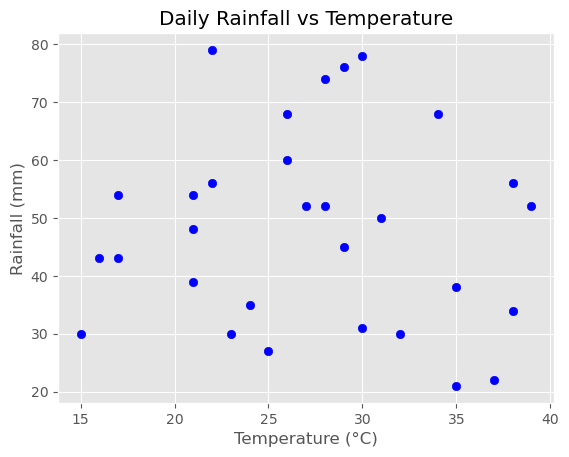

In [17]:
plt.scatter(isfahan_temp, isfahan_hum, color='blue', marker='o')
plt.xlabel("Temperature (°C)")
plt.ylabel("Rainfall (mm)")
plt.title("Daily Rainfall vs Temperature")
plt.grid(True)
plt.show()

## We can't see any meaningful relationship between hemp and hum because the both created using random procedure. 